## **import libraries**

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## **Load the dataset**

In [3]:
df = pd.read_csv('Online Retail.csv', encoding='latin-1')


#  **preprocessing technique**

# 1) Data Cleaning


## 1.1 Identify Missing Values

In [4]:
# check the any missing values have
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


## 1.2 Drop Missing Data  

In [5]:
df = df.dropna(subset=['CustomerID'])

In [6]:
df = df.dropna(subset=['Description'])

### 1.2 Find the negative values or zero for quantity


In [7]:
print(df [df['Quantity'] < 0])

       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

            InvoiceDate  UnitPrice  CustomerID         Country  
141      12/1/2010 9:41      27.50     14527.0

### 1.3 Remove the negative or zero quantities

In [8]:
df = df[df['Quantity'] > 0]

### 1.4 Detecting the Duplicate

In [9]:
duplicates = df[df.duplicated()]
print("Exact duplicates:\n", duplicates)


Exact duplicates:
        InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

            InvoiceDate  UnitPrice  CustomerID         Country  
517     12/1/20

### 1.5 Remove the duplicates

In [10]:
df_cleaned = df.drop_duplicates()

###### Detecting Noise

###### Noise can be:

Outliers (extreme values)

Incorrect labels

Random errors or typos

###  Detect Outliers

In [11]:
from scipy import stats
import numpy as np

# Z-score method
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).any(axis=1)

print("Outlier rows:\n", outliers.sum())

Outlier rows:
 609




#### Display the outliers

In [12]:
print("Outlier rows:\n",  df[outliers])

Outlier rows:
        InvoiceNo StockCode                         Description  Quantity  \
246       536392     22827  RUSTIC  SEVENTEEN DRAWER SIDEBOARD         1   
730       536437     17021              NAMASTE SWAGAT INCENSE       600   
3790      536676     21769         VINTAGE POST OFFICE CABINET         1   
3917      536736     22616          PACK OF 12 LONDON TISSUES        600   
4850      536809     84950      ASSORTED COLOUR T-LIGHT HOLDER      1824   
...          ...       ...                                 ...       ...   
537883    581375     21137            BLACK RECORD COVER FRAME       960   
540061    581457     23543                 WALL ART KEEP CALM        698   
540070    581458     22197                      POPCORN HOLDER      1500   
540071    581459     22197                      POPCORN HOLDER      1200   
540421    581483     23843         PAPER CRAFT , LITTLE BIRDIE     80995   

            InvoiceDate  UnitPrice  CustomerID         Country  
246    

### Visualize Noise

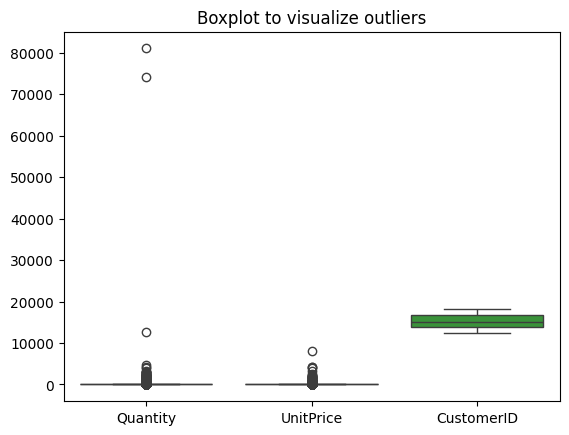

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title("Boxplot to visualize outliers")
plt.show()


### --- Remove outliers using IQR


In [14]:
Q1 = df.select_dtypes(include=np.number).quantile(0.25)
Q3 = df.select_dtypes(include=np.number).quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df_cleaned[~((df_cleaned.select_dtypes(include=np.number) < (Q1 - 1.5 * IQR)) | (df_cleaned.select_dtypes(include=np.number) > (Q3 + 1.5 * IQR))).any(axis=1)]